In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

K=1, Accuracy=0.97
K=2, Accuracy=0.93
K=3, Accuracy=0.93
K=4, Accuracy=0.93
K=5, Accuracy=0.93
K=6, Accuracy=0.93
K=7, Accuracy=0.97
K=8, Accuracy=0.93
K=9, Accuracy=0.97
K=10, Accuracy=0.97


In [11]:
best_k = np.argmax(accuracies) + 1
print(f"\nBest K = {best_k} (Accuracy = {accuracies[best_k-1]:.2f})")



Best K = 1 (Accuracy = 0.97)


In [13]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))



Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
print("\nSample of Actual vs Predicted (first 5 test cases):")
for i in range(5):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[y_pred_best[i]]
    print("Actual:", actual, "| Predicted:", predicted)



Sample of Actual vs Predicted (first 5 test cases):
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa


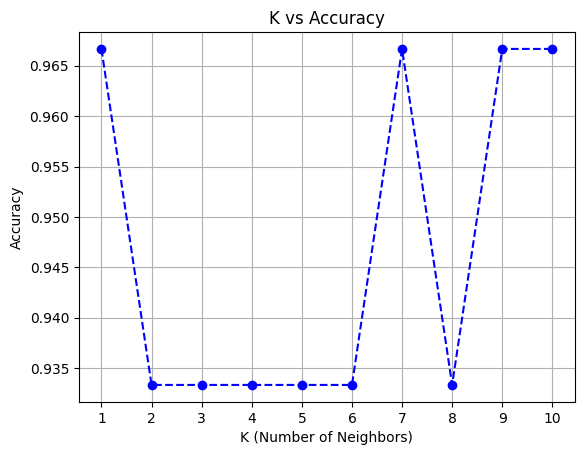

In [17]:
plt.plot(range(1, 11), accuracies, marker='o', linestyle='--', color="b")
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()